In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math 
import scipy.stats as stats
import seaborn as sns
import json 
from datetime import datetime

In [29]:
data = pd.read_csv("C:/Users/galla/OneDrive/Documents/DataScience/archive-2017-2018/USvideos.csv")

In [30]:
data


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [31]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [33]:
print(data.isnull().sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [34]:
nan_descriptions = data[data['description'].isna()]
nan_descriptions.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


In [35]:
data['description'] = data['description'].fillna(value="")


In [36]:

print(data.isnull().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


In [37]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [38]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [13]:
#### Added suggested ideas from class comments  
# look at how long the video took to get to trending 
# and how long it stayed there. "how trending was it"

# add analyzation of how long it took videos to get to trending 

In [88]:

# convert columns to datetime format
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')

# extract date part of publish_time and subtract from trending_date
data['days_to_trending'] = (data['trending_date'].dt.date - data['publish_time'].dt.date).dt.days

# display results
#print(data)
#print(data[['video_id', 'title', 'publish_time', 'trending_date', 'days_to_trending']])


# count number of occurrences of each unique value in the column
#numOfdays_count = data['days_to_trending'].value_counts()#.sort_index()
#print(numOfdays_count.max())

#days_to_trend = (data['trending_date'].dt.date - data['publish_time'].dt.date).dt.days
counts = data['days_to_trending'].value_counts()
table = pd.DataFrame({'Days to Trending': counts.index, 'Count': counts.values})
print(table)





     Days to Trending  Count
0                   4   4694
1                   3   4643
2                   5   4584
3                   2   4303
4                   6   4038
..                ...    ...
341               584      1
342              2933      1
343               583      1
344               582      1
345              1679      1

[346 rows x 2 columns]


In [41]:
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,27
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,,27
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,27
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,28


In [ ]:
# MOST LIKED VIDEOS

In [12]:
data.sort_values(by='likes', ascending=False).drop_duplicates(subset=['video_id']).head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
3581,kTlv5_Bs8aw,17.01.12,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",36857298,2729292,47896,546100,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...


In [13]:
likes = data["likes"]

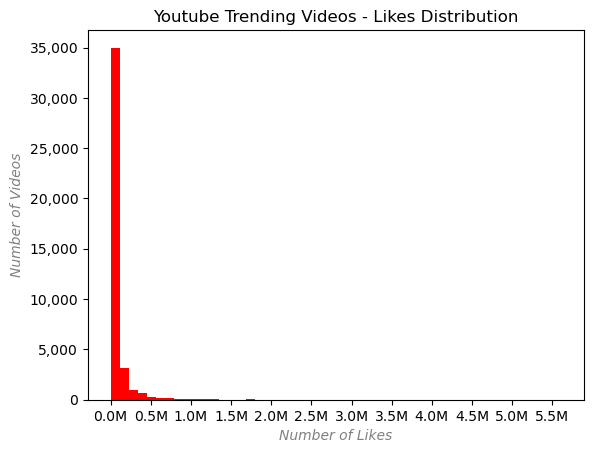

In [14]:
plt.hist(likes, bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/ 1e6))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Likes", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Likes Distribution")
plt.show()

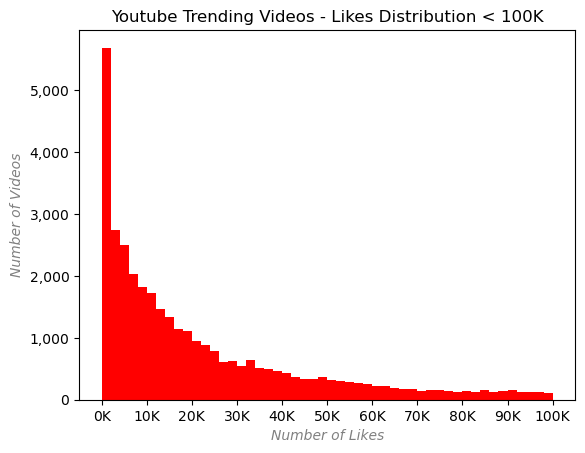

In [15]:
filter_likes = data[data["likes"] < 100000]

plt.hist(filter_likes["likes"], bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x * 1e-3))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Likes", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Likes Distribution < 100K")
plt.show()


In [16]:
# min number of likes 
print("min: ", data["likes"].min())

# percentage 
lessThan1_likes = data[data['likes'] < 100000]
num_videos_likes = len(lessThan1_likes)
total_videos_likes = len(data)
percent1_likes = (num_videos_likes/total_videos_likes) * 100
print("percentage of videos with less than 100K likes: ", percent1_likes)



min:  0
percentage of videos with less than 100K likes:  83.91657915944222


In [17]:
# percentage more than 100K
moreThan1_likes = data[data['likes'] > 100000]
num_videos_likes = len(moreThan1_likes)
total_videos_likes = len(data)
percent2_likes = (num_videos_likes/total_videos_likes) * 100
print("percentage of videos with more than 100K likes: ", percent2_likes)



percentage of videos with more than 100K likes:  16.08097877848055


Text(0.5, 1.0, 'Percentage of Videos by Likes')

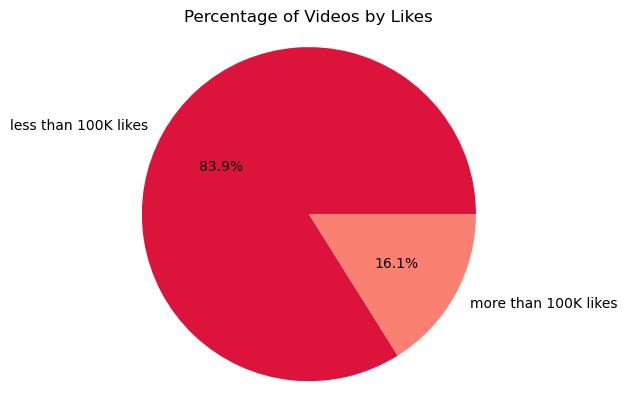

In [18]:
# pie chart 
labels = 'less than 100K likes', 'more than 100K likes'
sizes = [percent1_likes, percent2_likes]
colors = ['crimson', 'salmon']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Percentage of Videos by Likes')

In [19]:
# 0 likes is sus for a trending video 
# check how many rows have 0 likes 
data[data["likes"] == 0].shape[0]


172

In [20]:
data["likes"].max()

5613827

In [21]:
# average likes 
avg_likes = data["likes"].mean()
print(avg_likes)


74266.7024347359


In [22]:
#dislikes
data["dislikes"].max()

1674420

In [23]:
data.sort_values(by='dislikes', ascending=False).drop_duplicates(subset=['video_id']).head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
15571,oWjxSkJpxFU,18.01.02,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
17063,_5d-sQ7Fh5M,18.09.02,LOGAN PAUL IS BACK!,Logan Paul Vlogs,24,2018-02-04T22:02:27.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",14161833,1216340,291900,436698,https://i.ytimg.com/vi/_5d-sQ7Fh5M/default.jpg,False,False,False,Do It Different. Be a Maverick ► https://ShopL...


In [24]:
# dislikes distribution
dislikes = data["dislikes"]

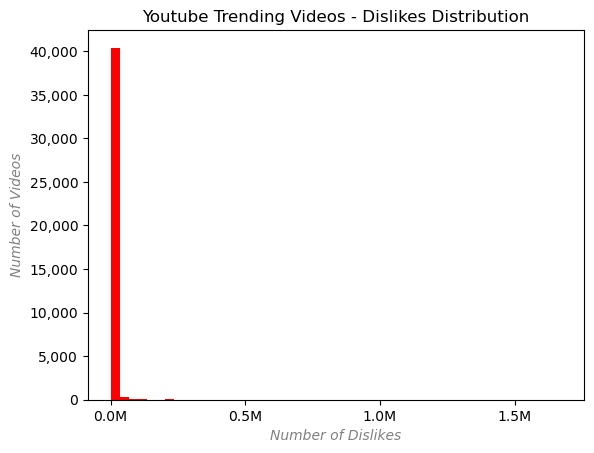

In [25]:
plt.hist(dislikes, bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/ 1e6))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Dislikes", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Dislikes Distribution")
plt.show()

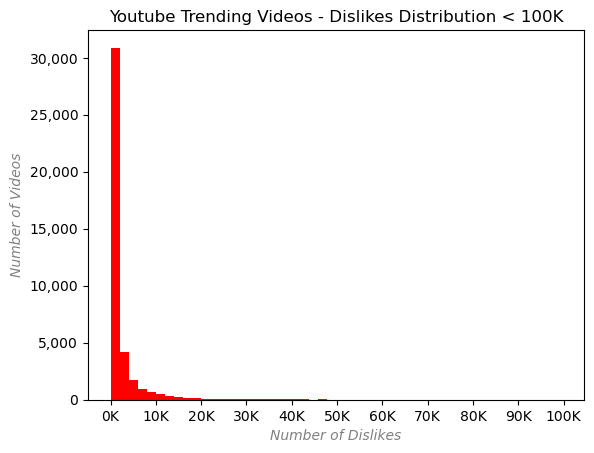

In [26]:
filter_dislikes = data[data["dislikes"] < 100000]

plt.hist(filter_dislikes["dislikes"], bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x * 1e-3))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Dislikes", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Dislikes Distribution < 100K")
#plt.show()

path = 'C:/Users/galla/OneDrive/Pictures/histogram.jpg'
plt.savefig(path)


In [27]:
#path = 'C:/Users/galla/OneDrive/Pictures/histogram.png'
#plt.savefig(path)


In [28]:
data['dislikes'].max()

1674420

In [29]:
# min number of dislikes 
print("min: ", data["dislikes"].min())

# percentage 
lessThan1_dis = data[data['dislikes'] < 100000]
num_videos_dis = len(lessThan1_dis)
total_videos_dis = len(data)
percent1_dislikes = (num_videos_dis/total_videos_dis) * 100
print("percentage of videos with less than 100K dislikes: ", percent1_dislikes)

# percentage more than 100K
moreThan1_dis = data[data['dislikes'] > 100000]
num_videos_dislikes = len(moreThan1_dis)
total_videos_dislikes = len(data)
percent2_dislikes = (num_videos_dislikes/total_videos_dislikes) * 100
print("percentage of videos with more than 100K dislikes: ", percent2_dislikes)

min:  0
percentage of videos with less than 100K dislikes:  99.56775501233241
percentage of videos with more than 100K dislikes:  0.43224498766758657


Text(0.5, 1.0, 'Percentage of Videos by Dislikes')

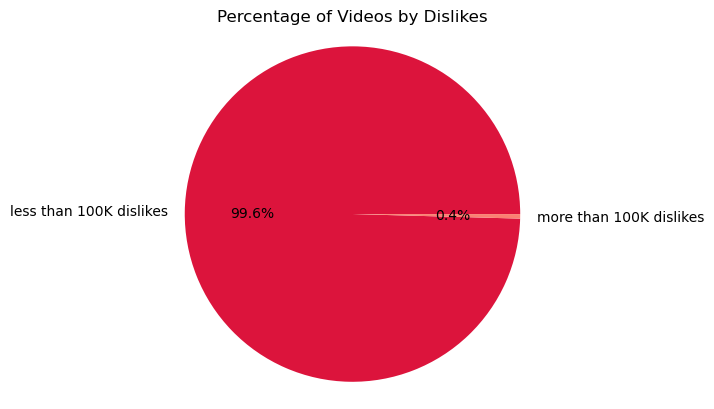

In [30]:
# pie chart 
labels = 'less than 100K dislikes', 'more than 100K dislikes'
sizes = [percent1_dislikes, percent2_dislikes]
colors = ['crimson', 'salmon']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Percentage of Videos by Dislikes')

In [31]:
# check how many rows have 0 dislikes 
data[data["dislikes"] == 0].shape[0]


383

In [32]:
# average dislikes 
avg_dislikes = data["dislikes"].mean()
print(avg_dislikes)


3711.400888910596


In [33]:
#views

data["views"].max()

225211923

In [34]:
data.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id']).head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


In [35]:
# views distribution 
views = data["views"]

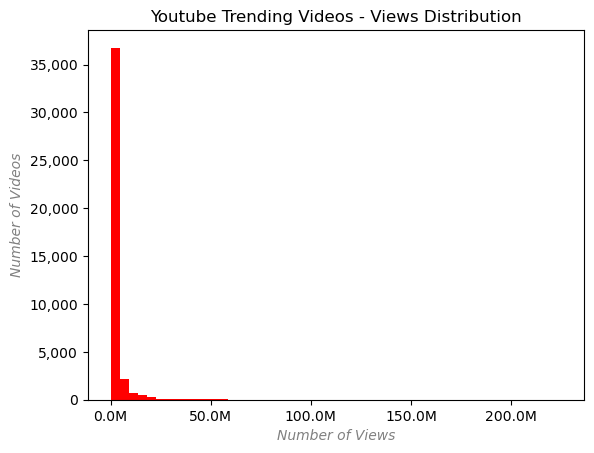

In [36]:
plt.hist(views, bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/ 1e6))
plt.gca().xaxis.set_major_formatter(formatter)

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Views", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Views Distribution")
plt.show()

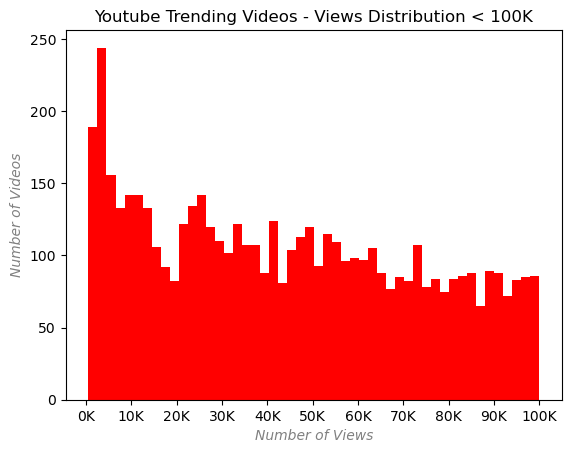

In [37]:
filter_views = data[data["views"] < 100000]

plt.hist(filter_views["views"], bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x * 1e-3))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Views", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Views Distribution < 100K")
plt.show()

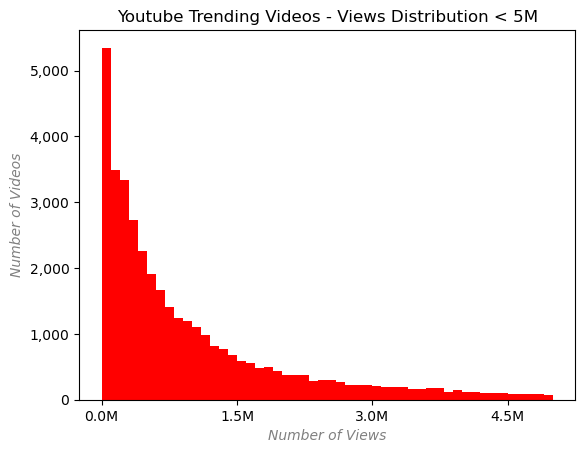

In [38]:
filter_views = data[data["views"] < 5000000]

plt.hist(filter_views["views"], bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/ 1e6))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1500000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Views", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Views Distribution < 5M")
plt.show()

In [39]:
# max number of views 
data["views"].max()

225211923

In [40]:
data.sort_values(by='views', ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


In [41]:
data.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id']).head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


In [42]:
# min number of views 
print("min: ", data["views"].min())

# percentage 
lessThan1_v = data[data['views'] < 100000]
num_videos_v = len(lessThan1_v)
total_videos_v = len(data)
percent1_views = (num_videos_v/total_videos_v) * 100
print("percentage of videos with less than 100K views: ", percent1_views)

# percentage more than 100K
moreThan1_views = data[data['views'] > 100000]
num_videos_views = len(moreThan1_views)
total_videos_views = len(data)
percent2_views = (num_videos_views/total_videos_views) * 100
print("percentage of videos with more than 100K views: ", percent2_views)

min:  549
percentage of videos with less than 100K views:  13.016190871571956
percentage of videos with more than 100K views:  86.98380912842805


Text(0.5, 1.0, 'Percentage of Videos by Views')

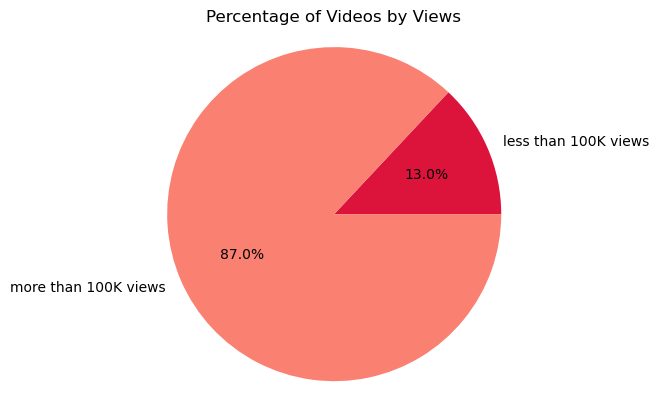

In [43]:
# pie chart 
labels = 'less than 100K views', 'more than 100K views'
sizes = [percent1_views, percent2_views]
colors = ['crimson', 'salmon']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Percentage of Videos by Views')

In [44]:
# average views 
avg_views = data["views"].mean()
print(avg_views)


2360784.6382573447


In [45]:
# comments
data['comment_count'].max()

1361580

In [46]:
data.sort_values(by='comment_count', ascending=False).drop_duplicates(subset=['video_id']).head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
5020,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251797,1127798,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
15571,oWjxSkJpxFU,18.01.02,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...
3581,kTlv5_Bs8aw,17.01.12,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",36857298,2729292,47896,546100,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...


In [47]:
# comments distribution 
comments = data["comment_count"]

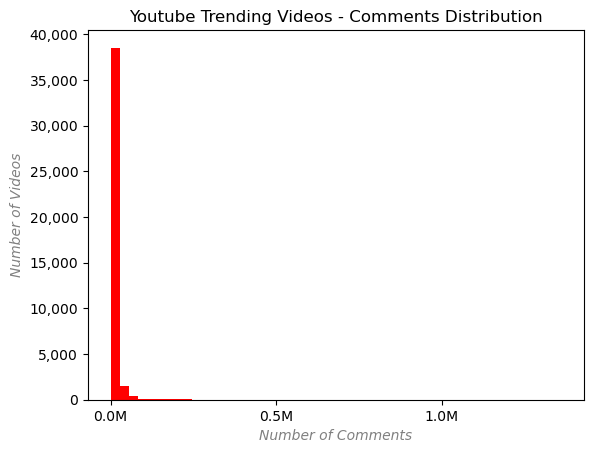

In [48]:
plt.hist(comments, bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/ 1e6))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Comments", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Comments Distribution")
plt.show()

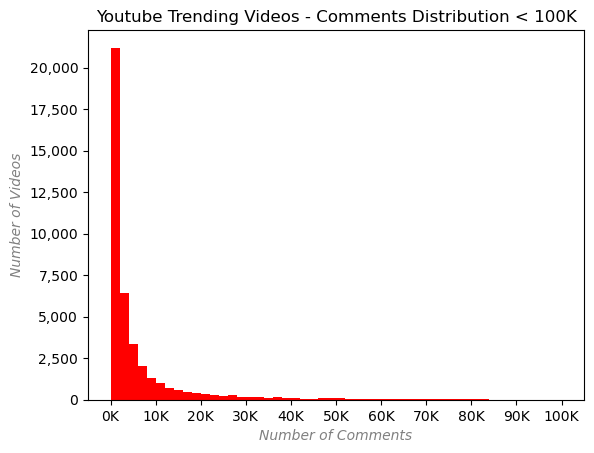

In [49]:
# filter comments 
filter_comments = data[data["comment_count"] < 100000]

plt.hist(filter_comments["comment_count"], bins= 50, color= "red") 
formatter  = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x * 1e-3))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10000))

# format y axis to have , 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

# add axis labels and histogram title 
plt.xlabel("Number of Comments", fontstyle='italic', color="gray")
plt.ylabel("Number of Videos", fontstyle='italic', color="gray")
plt.title("Youtube Trending Videos - Comments Distribution < 100K")
plt.show()

In [50]:
# max number of comments 
data["comment_count"].max()


1361580

In [51]:
# min number of comments 
print("min: ", data["comment_count"].min())

# percentage 
lessThan1_c = data[data['comment_count'] < 100000]
num_videos_c = len(lessThan1_c)
total_videos_c = len(data)
percent1_comments = (num_videos_c/total_videos_c) * 100
print("percentage of videos with less than 100K comments: ", percent1_comments)

# percentage more than 100K
moreThan1_comm = data[data['comment_count'] > 100000]
num_videos_comm = len(moreThan1_comm)
total_videos_comm = len(data)
percent2_comments = (num_videos_comm/total_videos_comm) * 100
print("percentage of videos with more than 100K comments: ", percent2_comments)

min:  0
percentage of videos with less than 100K comments:  98.99142836210896
percentage of videos with more than 100K comments:  1.0085716378910352


Text(0.5, 1.0, 'Percentage of Videos by Comments')

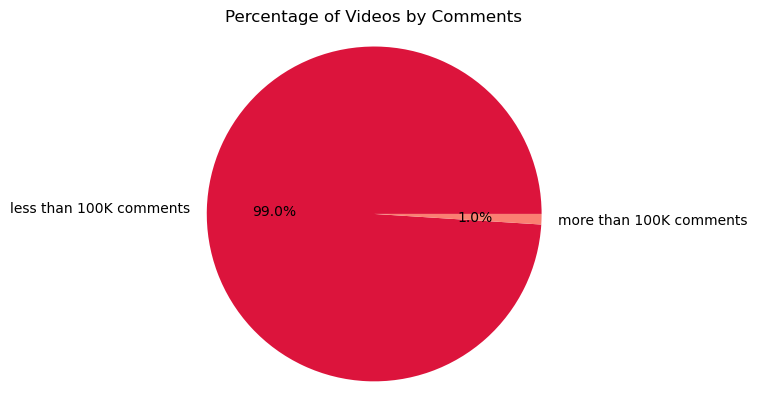

In [52]:
# pie chart 
labels = 'less than 100K comments', 'more than 100K comments'
sizes = [percent1_comments, percent2_comments]
colors = ['crimson', 'salmon']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Percentage of Videos by Comments')

In [53]:
# avg number of comments 
avg_comments = data["comment_count"].mean()
print(avg_comments)

8446.803682629612


In [54]:
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

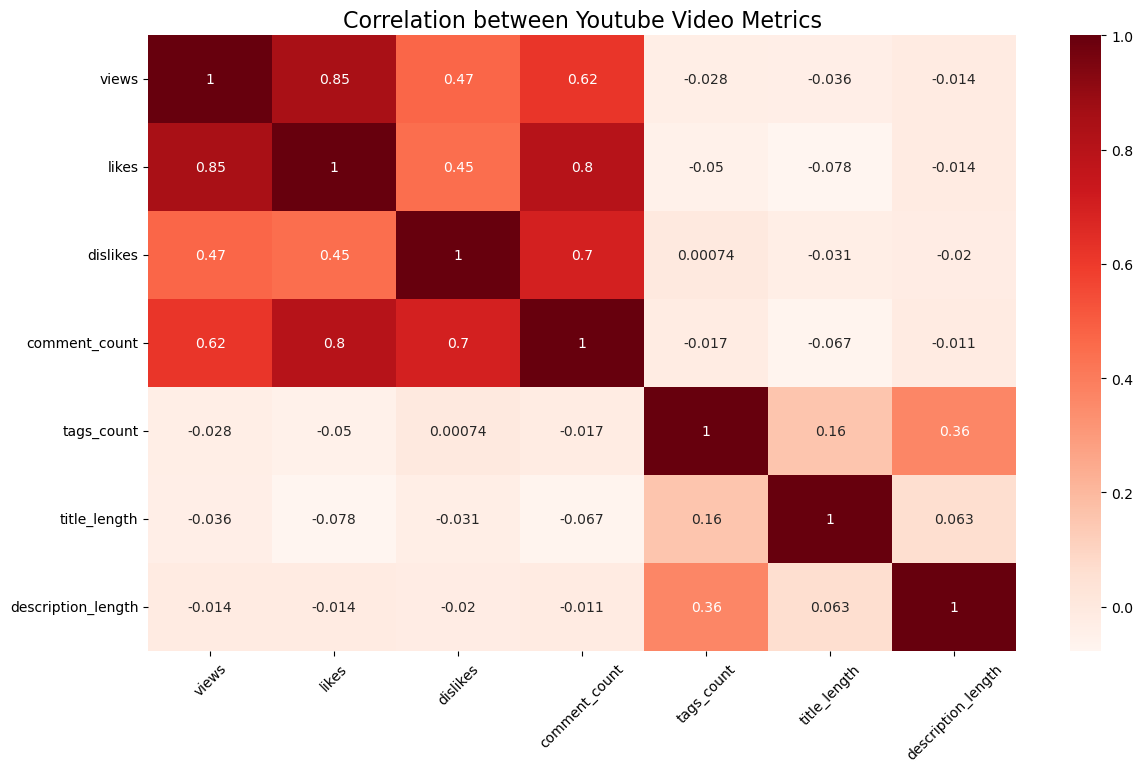

In [56]:
# how are the columns correlated?
data['title_length'] = data['title'].str.len()
data['tags_count'] = data['tags'].apply(lambda x: len(x.split('|')) if x != '[none]' else 0)
data['description_length'] = data['description'].str.len()

heatmap_columns = ['views', 'likes', 'dislikes', 'comment_count', 'tags_count',
                    'title_length', 'description_length',]

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(data[heatmap_columns].corr(), annot=True, cmap='Reds')
ax.set_xticklabels(heatmap_columns, rotation=45)
ax.set_yticklabels(heatmap_columns, rotation=0)
ax.set_title("Correlation between Youtube Video Metrics", fontsize=16)
plt.show()


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [58]:
# scatterplot to clearly see the relationship between likes and views


In [59]:
# scatterplot to clearly see the relationship between comment_count and views


In [60]:
# remove duplicates 
data.drop_duplicates(subset='video_id', keep='first', inplace=True)


In [61]:
# does it depend on the category ? 
# read JSON file 
with open('C:/Users/galla/OneDrive/Documents/DataScience/archive-2017-2018/US_category_id.json') as cat:
    data_categories = json.load(cat)['items']
    
dictionary = {}

for category in data_categories:
    dictionary[int(category['id'])] = category['snippet']['title']
data['category_title'] = data['category_id'].map(dictionary)



Text(0.5, 1.0, 'Youtube Trending Video Categories')

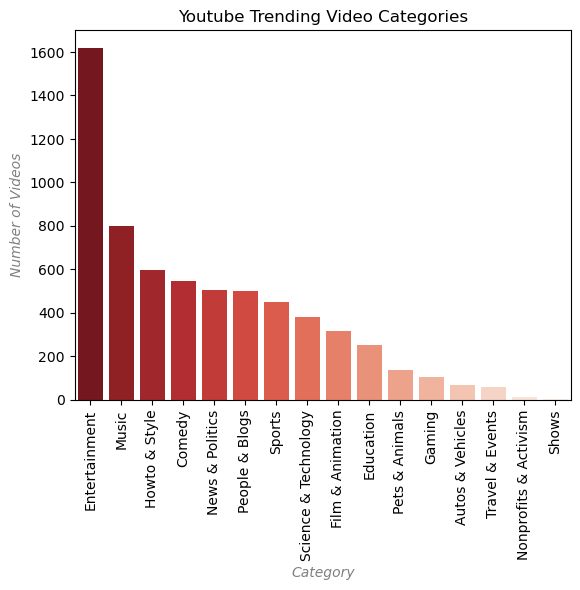

In [62]:
cdf = data["category_title"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_title", "category_title": "Number_of_Videos"}, inplace=True)
fig, ax = plt.subplots()

red_palette = sns.color_palette("Reds", n_colors=16)
sns.barplot(x="category_title", y="Number_of_Videos", 
                data=cdf, 
                palette=reversed(red_palette), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Category", fontstyle="italic", color="gray")
ax.set_ylabel("Number of Videos", fontstyle='italic', color='gray')
ax.set_title("Youtube Trending Video Categories", fontsize=12)


In [63]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,1,1410,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,4,630,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,23,1177,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32,27,1403,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,14,636,Entertainment


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 0 to 40766
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                6351 non-null   object
 1   trending_date           6351 non-null   object
 2   title                   6351 non-null   object
 3   channel_title           6351 non-null   object
 4   category_id             6351 non-null   int64 
 5   publish_time            6351 non-null   object
 6   tags                    6351 non-null   object
 7   views                   6351 non-null   int64 
 8   likes                   6351 non-null   int64 
 9   dislikes                6351 non-null   int64 
 10  comment_count           6351 non-null   int64 
 11  thumbnail_link          6351 non-null   object
 12  comments_disabled       6351 non-null   bool  
 13  ratings_disabled        6351 non-null   bool  
 14  video_error_or_removed  6351 non-null   bool  
 15  des

In [65]:
# does it depend on the title?

# does it depend on the thumbnails ?

In [66]:
data.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id']).head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
23824,-BQJo3vK8O8,18.15.03,Maluma - El Préstamo (Official Video),MalumaVEVO,10,2018-03-09T11:00:01.000Z,"Maluma Music|""Maluma Official Video""|""Maluma V...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,37,24,715,Music
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,35,6,784,Music
28605,i0p1bmr0EmE,18.14.04,TWICE What is Love? M/V,jypentertainment,10,2018-04-09T08:59:51.000Z,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...,23,35,498,Music
3200,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,55,11,448,Entertainment
70,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,43,10,1250,Music


In [67]:
data.drop_duplicates(subset='video_id', keep='first', inplace=True)


In [68]:
filter_entertainment = data[data['category_title'] == 'Entertainment']
filter_entertainment.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,4,630,Entertainment
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32,27,1403,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,14,636,Entertainment
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,41,42,503,Entertainment
11,VifQlJit6A0,17.14.11,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,24,2017-11-13T03:00:00.000Z,"The Walking Dead|""shiva""|""tiger""|""king ezekiel...",104578,1576,303,1279,https://i.ytimg.com/vi/VifQlJit6A0/default.jpg,False,False,False,Shiva arrives just in time as King Ezekiel att...,78,40,819,Entertainment


In [69]:
filter_music = data[data['category_title'] == 'Music']
filter_music.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
12,5E4ZBSInqUU,17.14.11,Marshmello - Blocks (Official Music Video),marshmello,10,2017-11-13T17:00:00.000Z,"marshmello|""blocks""|""marshmello blocks""|""block...",687582,114188,1333,8371,https://i.ytimg.com/vi/5E4ZBSInqUU/default.jpg,False,False,False,WATCH SILENCE MUSIC VIDEO ▶ https://youtu.be/T...,42,23,1042,Music
32,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158531,787419,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,42,6,594,Music
37,e_7zHm7GsYc,17.14.11,Hunter Hayes - You Should Be Loved (Part One O...,Hunter Hayes,10,2017-11-13T15:01:18.000Z,"Hunter|""Hayes""|""you should be loved""|""the shad...",13917,1318,24,76,https://i.ytimg.com/vi/e_7zHm7GsYc/default.jpg,False,False,False,You Should Be Loved (feat. The Shadowboxers) A...,57,13,587,Music
39,zZ9FciUx6gs,17.14.11,Nickelback - The Betrayal Act III [Official Vi...,Nickelback,10,2017-11-13T15:31:44.000Z,"Nickelback|""Feed The Machine""|""The Betrayal Ac...",57169,6927,161,565,https://i.ytimg.com/vi/zZ9FciUx6gs/default.jpg,False,False,False,"New Album, ‘Feed The Machine’, Available Now: ...",50,14,273,Music
40,PaJCFHXcWmM,17.14.11,U2 - The Blackout,U2VEVO,10,2017-11-13T17:00:04.000Z,"U2|""The""|""Blackout""|""Island""|""Records""|""Rock""",60506,5389,106,455,https://i.ytimg.com/vi/PaJCFHXcWmM/default.jpg,False,False,False,'The Blackout’ from upcoming album Songs of Ex...,17,6,402,Music


In [70]:
filter_howTo = data[data['category_title'] == 'Howto & Style']
filter_howTo.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
23,JBZTZZAcFTw,17.14.11,"What $4,800 Will Get You In NYC | Sweet Digs H...",Refinery29,26,2017-11-12T16:00:01.000Z,"refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,1707,578,673,https://i.ytimg.com/vi/JBZTZZAcFTw/default.jpg,False,False,False,"On this episode of Sweet Digs, we tour Social ...",67,35,1344,Howto & Style
27,qeWvgZLz9yU,17.14.11,A Smart... MUG?! - Take apart a Heated Thermos!,JerryRigEverything,26,2017-11-13T16:00:03.000Z,"Smart mug|""Heated thermos""|""tech""|""gift idea""|...",120727,9033,224,1346,https://i.ytimg.com/vi/qeWvgZLz9yU/default.jpg,False,False,False,YouTubes new channel!: https://www.youtube.com...,47,18,1780,Howto & Style
45,BWPrk9PUwQE,17.14.11,iPhone X vs Makeup Transformation (Face ID TEST),dope2111,26,2017-11-12T00:45:54.000Z,"iphone x|""iphonex makeup""|""iphonex test""|""new ...",1456472,33505,1660,2160,https://i.ytimg.com/vi/BWPrk9PUwQE/default.jpg,False,False,False,I was really curious to see how good Apple's i...,48,17,882,Howto & Style
69,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,45,9,821,Howto & Style
80,gLswXiRLdkA,17.14.11,A VERY #EXTRA EBAY SHOPPING HAUL!,Amber Scholl,26,2017-11-11T02:42:23.000Z,"ebay|""haul""|""cheap""|""challenge""|""extra""|""amber...",484185,23296,1184,1858,https://i.ytimg.com/vi/gLswXiRLdkA/default.jpg,False,False,False,LOL HI ANGELS!\n\nTODAY WE ARE DOING AN ONLINE...,33,12,1000,Howto & Style


In [71]:
filter_comedy = data[data['category_title'] == 'Comedy']
filter_comedy.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,23,1177,Comedy
16,ZAQs-ctOqXQ,17.14.11,One Change That Would Make Pacific Rim a Classic,Cracked,23,2017-11-12T17:00:05.000Z,"pacific rim|""pacific rim 2""|""pacific rim seque...",295639,8011,638,1256,https://i.ytimg.com/vi/ZAQs-ctOqXQ/default.jpg,False,False,False,"Pacific Rim was so good, we can’t believe they...",48,32,1145,Comedy
24,lZ68j2J_GOM,17.14.11,Using Other People's Showers,Gus Johnson,23,2017-11-13T14:44:24.000Z,"using other peoples showers|""gus""|""gus shower""...",33980,4884,52,234,https://i.ytimg.com/vi/lZ68j2J_GOM/default.jpg,False,False,False,Why is it so hard to figure out other people's...,28,26,935,Comedy
38,dQvIbulWCM4,17.14.11,Celebrities on Thanksgiving 2017!,Niki and Gabi,23,2017-11-12T23:41:48.000Z,"niki and gabi|""nikiandgabibeauty""|""celebrities...",605932,38397,1387,3412,https://i.ytimg.com/vi/dQvIbulWCM4/default.jpg,False,False,False,Celebrities on Thanksgiving 2017!\nWhat if one...,33,15,1827,Comedy
67,t4YAyT4ihIQ,17.14.11,Getting My Driver's License | Lele Pons,Lele Pons,23,2017-11-10T18:30:01.000Z,"getting my drivers license|""lele""|""pons""|""gett...",3358068,120876,8279,6408,https://i.ytimg.com/vi/t4YAyT4ihIQ/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ https://youtu.be/T8j...,39,27,1305,Comedy


In [72]:
filter_news = data[data['category_title'] == 'News & Politics']
filter_news.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",53,20,2257,News & Politics
13,GgVmn66oK_A,17.14.11,Which Countries Are About To Collapse?,NowThis World,25,2017-11-12T14:00:00.000Z,"nowthis|""nowthis world""|""world news""|""nowthis ...",544770,7848,1171,3981,https://i.ytimg.com/vi/GgVmn66oK_A/default.jpg,False,False,False,"The world at large is improving, but some coun...",38,25,871,News & Politics
28,iIxy3JN3-jc,17.14.11,LeBron James admits he was ripping Phil Jackso...,Cleveland Cavaliers on cleveland.com,25,2017-11-13T15:42:28.000Z,auth-jvardon-auth,27943,156,36,83,https://i.ytimg.com/vi/iIxy3JN3-jc/default.jpg,False,False,False,LeBron James gave another all-time press confe...,100,1,63,News & Politics
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,65,10,682,News & Politics
51,c-3JxzN2u34,17.14.11,Lin-Manuel Miranda's next act: Helping rebuild...,CBS Sunday Morning,25,2017-11-12T15:05:55.000Z,"CBS Sunday Morning|""CBS News""|""news""|""On The R...",6473,205,6,15,https://i.ytimg.com/vi/c-3JxzN2u34/default.jpg,False,False,False,Correspondent David Begnaud joins Lin-Manuel M...,58,8,1483,News & Politics


In [73]:
filter_blogs = data[data['category_title'] == 'People & Blogs']
filter_blogs.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,1,1410,People & Blogs
35,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,20,4,102,People & Blogs
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,75,44,630,People & Blogs
54,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,72,12,732,People & Blogs
66,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,45,25,665,People & Blogs


In [74]:
filter_sports = data[data['category_title'] == 'Sports']
filter_sports.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,86,49,1290,Sports
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,,51,0,0,Sports
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,,50,3,0,Sports
48,zNqCVTs38nU,17.14.11,Heidelberg's nifty hook-and-lateral to the lef...,D3sports.com,17,2017-11-13T02:15:30.000Z,"D3sports|""NCAA Division III""|""D3sports.com""|""D...",4569,35,18,19,https://i.ytimg.com/vi/zNqCVTs38nU/default.jpg,False,False,False,Tyler Stoyle hits Demetrius Magee for a short ...,54,8,258,Sports
52,069D0NmW39o,17.14.11,"Wildest Superstar distractions: WWE Top 10, No...",WWE,17,2017-11-11T15:00:00.000Z,"wwe|""world wrestling entertainment""|""wrestling...",1044813,15397,838,1100,https://i.ytimg.com/vi/069D0NmW39o/default.jpg,False,False,False,A timely distraction can create real trouble f...,57,31,424,Sports


In [75]:
filter_sci = data[data['category_title'] == 'Science & Technology']
filter_sci.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,21,7,1511,Science & Technology
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,35,13,734,Science & Technology
15,kgaO45SyaO4,17.14.11,The New SpotMini,BostonDynamics,28,2017-11-13T20:09:58.000Z,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",75752,9419,52,1230,https://i.ytimg.com/vi/kgaO45SyaO4/default.jpg,False,False,False,For more information . . . stay tuned.,16,5,38,Science & Technology
18,eNSN6qet1kE,17.14.11,HomeMade Electric Airplane,PeterSripol,28,2017-11-13T15:30:17.000Z,"ultralight|""airplane""|""homemade""|""DIY""|""hoverb...",97007,11963,36,2211,https://i.ytimg.com/vi/eNSN6qet1kE/default.jpg,False,False,False,aaaannnd now to fly out of ground effect! The ...,26,18,1512,Science & Technology
21,6VhU_T463sU,17.14.11,The Making of Hela's Headdress from Thor: Ragn...,Tested,28,2017-11-12T15:00:01.000Z,"tested|""testedcom""|""designercon 2017""|""preview...",224019,3585,138,208,https://i.ytimg.com/vi/6VhU_T463sU/default.jpg,False,False,False,"At this year's DesignerCon, we meet up with Ir...",50,18,1134,Science & Technology


In [76]:
filter_film = data[data['category_title'] == 'Film & Animation']
filter_film.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",65,28,1310,Film & Animation
29,n30k5CwLhS4,17.14.11,Nick Andopolis: Drummer,FaeryInLoveInc,1,2011-05-29T17:03:12.000Z,"freaks and geeks|""jason segel""|""judd apatow""|""...",50867,715,238,246,https://i.ytimg.com/vi/n30k5CwLhS4/default.jpg,False,False,False,"The opening of Freaks and Geeks Episode 6, I'm...",23,8,60,Film & Animation
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,46,28,402,Film & Animation
71,UFYCTJlayS4,17.14.11,Top 10 iPhone Apps for Productivity & Content ...,Sara Dietschy,1,2017-11-11T03:56:10.000Z,"best productivity apps 2017|""best iphone apps ...",52591,2233,187,255,https://i.ytimg.com/vi/UFYCTJlayS4/default.jpg,False,False,False,Best phone apps for creativity & being product...,54,12,2051,Film & Animation
86,fNtLIcyjsnI,17.14.11,Game Night Official Trailer #1 (2018) Rachel M...,Zero Media,1,2017-11-09T17:11:32.000Z,"Game Night|""2018""|""Jason Bateman""|""Rachel McAd...",1751064,16430,945,1231,https://i.ytimg.com/vi/fNtLIcyjsnI/default.jpg,False,False,False,"Game Night Trailer 1 (2018) Rachel McAdams, Ja...",83,13,92,Film & Animation


In [77]:
filter_edu = data[data['category_title'] == 'Education']
filter_edu.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
17,YVfyYrEmzgM,17.14.11,How does your body know you're full? - Hilary ...,TED-Ed,27,2017-11-13T16:00:07.000Z,"TED|""TED-Ed""|""TED Education""|""TED Ed""|""Hilary ...",78044,5398,53,385,https://i.ytimg.com/vi/YVfyYrEmzgM/default.jpg,False,False,False,Check out our Patreon page: https://www.patreo...,52,24,1133,Education
19,B5HORANmzHw,17.14.11,Founding An Inbreeding-Free Space Colony,SciShow,27,2017-11-12T22:00:01.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",223871,8421,191,1214,https://i.ytimg.com/vi/B5HORANmzHw/default.jpg,False,False,False,Thanks to 23AndMe for supporting SciShow. Thes...,40,17,3142,Education
20,vU14JY3x81A,17.14.11,How Can You Control Your Dreams?,Life Noggin,27,2017-11-13T14:00:03.000Z,"life noggin|""life noggin youtube""|""youtube lif...",115791,9586,75,2800,https://i.ytimg.com/vi/vU14JY3x81A/default.jpg,False,False,False,What if there was a way to control your dreams...,32,31,4159,Education
22,_-aDHxoblr4,17.14.11,Is It Dangerous To Talk To A Camera While Driv...,Tom Scott,27,2017-11-13T16:00:03.000Z,"tom scott|""tomscott""|""built for science""|""nati...",144418,11758,89,1014,https://i.ytimg.com/vi/_-aDHxoblr4/default.jpg,False,False,False,I'm visiting the University of Iowa's National...,50,8,614,Education
90,-2RVw2_QyxQ,17.14.11,2017 Champions Showdown: Day 3,Saint Louis Chess Club,27,2017-11-12T02:39:01.000Z,"Chess|""Saint Louis""|""Club""",67429,438,23,23,https://i.ytimg.com/vi/-2RVw2_QyxQ/default.jpg,False,False,False,The Saint Louis Chess Club hosts a series of f...,30,3,383,Education


In [78]:
filter_pets = data[data['category_title'] == 'Pets & Animals']
filter_pets.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
14,TaTleo4cOs8,17.14.11,SHOPPING FOR NEW FISH!!!,The king of DIY,15,2017-11-12T18:30:01.000Z,"shopping for new fish|""new fish""|""aquarium fis...",207532,7473,246,2120,https://i.ytimg.com/vi/TaTleo4cOs8/default.jpg,False,False,False,Today we go shopping for new fish for some of ...,24,14,1800,Pets & Animals
92,-OK9i1_YYYc,17.14.11,Animal Adventure Park Giraffe Cam,Animal Adventure Park,15,2017-11-12T00:18:43.000Z,"Giraffe|""Zoo""|""New York""|""giraffe cam""|""Animal...",45455,2282,35,17,https://i.ytimg.com/vi/-OK9i1_YYYc/default.jpg,False,False,False,November 2017 Giraffe Cam Hours\n\nEnjoy your ...,33,9,521,Pets & Animals
97,xfmipNU4Odc,17.14.11,Edna's registered owner thought she was dead f...,Hope For Paws - Official Rescue Channel,15,2017-11-10T18:02:04.000Z,[none],284666,16396,81,949,https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg,False,False,False,Please donate $5 and help us save more lives:\...,59,0,166,Pets & Animals
128,qEEtzzi1EII,17.14.11,Birthdays - Simon's Cat | GUIDE TO,Simon's Cat,15,2017-11-09T13:34:58.000Z,"cartoon|""simons cat""|""simon's cat""|""simonscat""...",426078,19323,245,945,https://i.ytimg.com/vi/qEEtzzi1EII/default.jpg,False,False,False,Watch Simon's Cat's Guide To Birthdays! \nSUBS...,34,44,1489,Pets & Animals
167,YHDbsyyjld0,17.14.11,A Tropical Island with 500 CATS!,Kitten Lady,15,2017-11-09T23:44:18.000Z,"lanai|""sanctuary""|""feral""|""hawaii""|""hawaiian""|...",46571,4250,16,408,https://i.ytimg.com/vi/YHDbsyyjld0/default.jpg,False,False,False,Lanai Cat Sanctuary in Hawaii is cat paradise!...,32,13,209,Pets & Animals


In [79]:
filter_gaming = data[data['category_title'] == 'Gaming']
filter_gaming.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
131,lsfzA7sWlOM,17.14.11,L.A. Noire - Nintendo Switch Trailer,Nintendo,20,2017-11-09T19:59:48.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",154872,7683,164,1734,https://i.ytimg.com/vi/lsfzA7sWlOM/default.jpg,False,False,False,Amid the post-war boom of Hollywood's Golden A...,36,32,815,Gaming
405,EEIP1YpFXrE,17.16.11,Our First Date,iHasCupquake,20,2017-11-15T20:00:00.000Z,"first date|""animation""|""animated""|""short""|""sho...",224426,17784,225,2762,https://i.ytimg.com/vi/EEIP1YpFXrE/default.jpg,False,False,False,Here's an animation short of our First Date! W...,14,26,975,Gaming
652,hXcoq5XDwyA,17.17.11,Playing CUPHEAD with MatPat!,Butch Hartman,20,2017-11-15T22:02:34.000Z,"game theory|""film theory""|""cuphead""|""don't dea...",55460,3871,96,428,https://i.ytimg.com/vi/hXcoq5XDwyA/default.jpg,False,False,False,"After my appearance on GTLive, MatPat (Game Th...",28,15,450,Gaming
1858,FaxqVBYVOVU,17.23.11,Mega Medley that was supposed to be 5 minutes ...,lara6683,20,2017-11-22T02:46:07.000Z,"twitch|""games""",87397,3617,29,237,https://i.ytimg.com/vi/FaxqVBYVOVU/default.jpg,False,False,False,Broadcasted live on Twitch -- Watch live at ht...,56,2,74,Gaming
3350,Upems4CB_ps,17.30.11,Chuck Norris - Hunter - World of Warcraft TV C...,MrNorrisVideos,20,2011-11-20T22:45:45.000Z,"Chuck|""Norris""|""Carlos""|""Ray""|""MrNorrisVideos""...",127521,696,52,233,https://i.ytimg.com/vi/Upems4CB_ps/default.jpg,False,False,False,http://www.facebook.com/MasterNorrisCom1 & htt...,62,20,410,Gaming


In [80]:
filter_autos = data[data['category_title'] == 'Autos & Vehicles']
filter_autos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
30,U0hAC8O7RoI,17.14.11,"I TOOK THE $3,000,000 LAMBO TO CARMAX! They of...",hp_overload,2,2017-11-13T01:43:12.000Z,"carmax|""lamborghini miura""|""miura carmax""|""lam...",98378,4035,495,486,https://i.ytimg.com/vi/U0hAC8O7RoI/default.jpg,False,False,False,Finally took the Miura to Carmax! Hope you enj...,60,11,115,Autos & Vehicles
58,pjuPpVLXDQg,17.14.11,Train Swipes Parked Vehicle,ViralHog,2,2017-11-13T00:46:11.000Z,"2017|""viralhog""|""Crash""|""Fail""|""Featured""|""tra...",7265,89,8,22,https://i.ytimg.com/vi/pjuPpVLXDQg/default.jpg,False,False,False,"Occurred on November 10, 2017 / Ha Noi, Vietna...",27,18,754,Autos & Vehicles
163,oB3SAI2oCqk,17.14.11,Caterham Chris Hoy 60 Second Donut Challenge,Caterham Cars,2,2017-11-09T09:59:31.000Z,"Caterham|""Chris Hoy""|""Caterham Seven""|""Avon Ty...",4850,22,1,1,https://i.ytimg.com/vi/oB3SAI2oCqk/default.jpg,False,False,False,Olympic legend Sir Chris Hoy is no stranger wh...,44,7,406,Autos & Vehicles
197,PoNWU2cox9w,17.14.11,Inside Keanu Reeves' Custom Motorcycle Shop | ...,WIRED,2,2017-11-08T15:00:27.000Z,"keanu reeves|""keanu""|""the matrix""|""john wick""|...",704363,16352,224,841,https://i.ytimg.com/vi/PoNWU2cox9w/default.jpg,False,False,False,Keanu Reeves gives Wired a tour of Arch Motorc...,51,36,959,Autos & Vehicles
273,kIUHDwn51y8,17.15.11,Evolution of the Jeep 4x4 Utility Vehicle | Do...,Donut Media,2,2017-11-13T15:00:05.000Z,"Jeep|""jeep wrangler""|""jeep 4x4""|""jeep cj""|""cj-...",93829,2229,36,469,https://i.ytimg.com/vi/kIUHDwn51y8/default.jpg,False,False,False,The original 4x4 utility vehicle by Jeep. \n\...,55,26,1310,Autos & Vehicles


In [81]:
filter_travel = data[data['category_title'] == 'Travel & Events']
filter_travel.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
34,p2hJxyF7mok,17.14.11,New Emirates First Class Suite | Boeing 777 | ...,Emirates,19,2017-11-12T05:55:42.000Z,"Emirates|""First Class""",141148,1661,70,236,https://i.ytimg.com/vi/p2hJxyF7mok/default.jpg,False,False,False,We are the changing the game in First Class tr...,54,2,304,Travel & Events
291,i-LCORFB860,17.15.11,'Lightning Strike' B777-300 on departure @ KL7...,Valk Aviation,19,2017-11-13T09:21:27.000Z,"Valk Aviation|""Amsterdam Airport""|""Schiphol""|""...",571588,386,47,113,https://i.ytimg.com/vi/i-LCORFB860/default.jpg,False,False,False,"(For licensing or usage, contact licensing@vir...",58,21,170,Travel & Events
541,QKwgif8OW1w,17.16.11,Vostok Brompton Beach Ride,Vostok.bike,19,2017-10-21T15:12:53.000Z,"Vostok.bike|""Brompton Bicycle""|""Brompton Alfin...",1118,6,0,2,https://i.ytimg.com/vi/QKwgif8OW1w/default.jpg,False,False,False,Early morning drone footage of a beach ride in...,26,4,137,Travel & Events
1258,r15_6z9xryo,17.20.11,Inside The World's Only Private Boeing 787 Dre...,Sam Chui,19,2017-11-17T13:01:28.000Z,"Boeing787|""Sam Chui""|""B787""|""Private Jet""|""Bus...",1126715,12919,1188,1248,https://i.ytimg.com/vi/r15_6z9xryo/default.jpg,False,False,False,Join me for a tour of the World's First and On...,54,9,735,Travel & Events
1439,U44YLdW9AL4,17.21.11,The Horrors of Flavored Water,Simon and Martina,19,2017-11-19T12:35:07.000Z,"simonandmartina|""simon""|""martina""|""simon and m...",224651,10504,300,1586,https://i.ytimg.com/vi/U44YLdW9AL4/default.jpg,False,False,False,"We’ve been in Japan for almost two years now, ...",29,13,695,Travel & Events


In [82]:
filter_nonprofits = data[data['category_title'] == 'Nonprofits & Activism']
filter_nonprofits.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
3313,aLSG3178eD4,17.30.11,Tell Hollywood to stand with immigrants,Define American,29,2017-11-28T13:00:35.000Z,"DACA|""black panther""",1456,0,0,0,https://i.ytimg.com/vi/aLSG3178eD4/default.jpg,True,True,False,"Undocumented in Hollywood? Yes, and we are #He...",39,2,1027,Nonprofits & Activism
4934,0jmDHoPUGKI,17.08.12,NSC | Face to Face with the Prescription Opioi...,National Safety Council,29,2017-12-05T13:50:17.000Z,"National Safety Council|""Opioid misuse""|""addic...",1967,19,0,3,https://i.ytimg.com/vi/0jmDHoPUGKI/default.jpg,False,False,False,"Each year 22,000 people die from prescription ...",54,24,237,Nonprofits & Activism
6463,6kLYXbNZWRs,17.16.12,Meet Teen Vogue's 2017 21 Under 21 | Teen Vogue,Teen Vogue,29,2017-12-15T17:00:19.000Z,"inspiring|""teen vogue""|""21 under 21""|""nadya""|""...",7052,686,13,29,https://i.ytimg.com/vi/6kLYXbNZWRs/default.jpg,False,False,False,"Meet Teen Vogue’s 21 Under 21 class of 2017, f...",47,30,433,Nonprofits & Activism
7547,xYShiXMGULE,17.21.12,Living under a bridge doesn't stop this homele...,Invisible People,29,2017-12-17T06:10:08.000Z,"mark horvath|""homeless""|""homelessness""|""invisi...",33685,1450,51,638,https://i.ytimg.com/vi/xYShiXMGULE/default.jpg,False,False,False,A few months back I logged onto Facebook and w...,77,30,4084,Nonprofits & Activism
10473,Pc1Obe1BWhc,18.05.01,Nina Dobrev wants to Save Sharks (30s),Oceana,29,2018-01-03T16:01:48.000Z,"Sharks|""Nina Dobrev""|""Shark finning""|""PSA""",4178,16,1,3,https://i.ytimg.com/vi/Pc1Obe1BWhc/default.jpg,False,False,False,"While shark finning is illegal in U.S. waters,...",38,4,379,Nonprofits & Activism


In [83]:
filter_shows = data[data['category_title'] == 'Shows']
filter_shows.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
7854,lM0yu7c6lQk,17.23.12,You're not crazy. Apple is slowing down older ...,CNET,43,2017-12-22T01:16:16.000Z,"Apple|""iPhone Slowdown""|""Apple Battery""|""Cultu...",110112,3547,180,1426,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...,67,44,541,Shows
14280,Q1CFfU2gXHw,18.26.01,Apple HomePod: Everything to know before you b...,CNET,43,2018-01-24T20:08:16.000Z,"Apple|""Homepod""|""smart home""|""Google Home""|""Am...",36609,810,66,220,https://i.ytimg.com/vi/Q1CFfU2gXHw/default.jpg,False,False,False,We'll break down all the new Apple HomePod det...,61,40,458,Shows
28565,7_FJUSBFbJM,18.14.04,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,2018-04-12T21:00:12.000Z,"bleacher report|""br""|""nba""|""game of zones""|""go...",657183,24107,310,1825,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",56,35,435,Shows
34161,V6ElE2xs48c,18.12.05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",765531,18681,461,1444,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",44,33,390,Shows


In [84]:
mostLikedCat = data[data['video_id'] == '7C2z4GqqS5E']
mostLikedCat


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,35,6,784,Music


In [88]:

mostDislikedCat = data[data['video_id'] == 'QwZT7T-TXT0']
mostDislikedCat


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
10000,QwZT7T-TXT0,18.03.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",13305605,835378,629120,733373,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,,9,20,0,Entertainment


In [89]:

mostViewedCat = data[data['video_id'] == 'VYOjWnS4cMY']
mostViewedCat

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,tags_count,description_length,category_title
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,4,213,Music


In [ ]:
# ml algorithm to support the correlations 